In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_olivetti_faces

# 0. Import i rysowanie 

In [3]:
X, y = fetch_olivetti_faces(return_X_y=True)

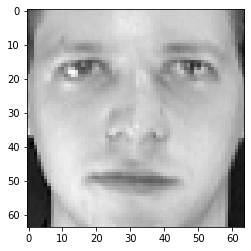

In [4]:
def draw_olivetti(DATA, which):
    plt.imshow(np.reshape(DATA[which], (64, 64)), cmap="gray")
draw_olivetti(X, 0)
plt.show()

# 1. PCA i kompresja

In [5]:
from sklearn.decomposition import PCA

In [6]:
comp_anal = PCA()
comp_anal.fit(X)

PCA()

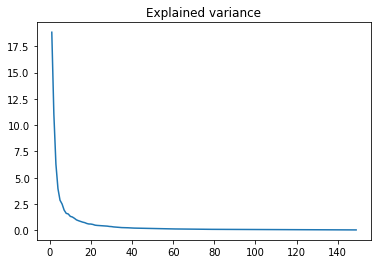

In [7]:
plt.plot(range(1, 150), comp_anal.explained_variance_[0:149])
plt.title("Explained variance")
plt.show()

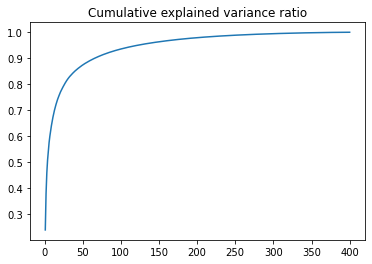

In [8]:
plt.plot(range(1, comp_anal.explained_variance_ratio_.shape[0]+1), np.cumsum(comp_anal.explained_variance_ratio_))
plt.title("Cumulative explained variance ratio")
plt.show()

Przyjmę odcięcie na poziomie 0.95 całkowitej wariancji

In [9]:
cutoff = np.abs(np.cumsum(comp_anal.explained_variance_ratio_)-0.95).argmin() + 1
cutoff

122

In [10]:
print("Stopień kompresji = {}".format(X.shape[1]/cutoff))

Stopień kompresji = 33.57377049180328


In [11]:
compressor = PCA(n_components=cutoff)
X_compressed = compressor.fit_transform(X)

# 2. Dekompresja

In [12]:
X_decompressed = compressor.inverse_transform(X_compressed)

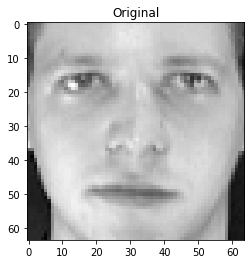

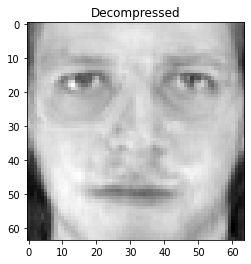

In [13]:
draw_olivetti(X, 0)
plt.title("Original")
plt.show()
draw_olivetti(X_decompressed, 0)
plt.title("Decompressed")
plt.show()

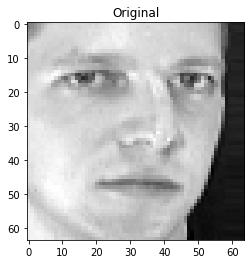

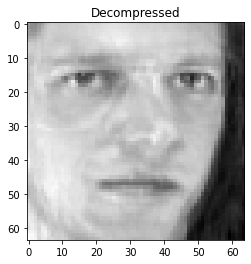

In [14]:
draw_olivetti(X, 1)
plt.title("Original")
plt.show()
draw_olivetti(X_decompressed, 1)
plt.title("Decompressed")
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
mean_squared_error(X, X_decompressed, squared=False)

0.030250661

In [47]:
# indywidualnie
mses = []
for row, row_d in zip(X, X_decompressed):
    mses.append(
        mean_squared_error(row, row_d, squared=False)
    )

In [18]:
len(mses)

400

In [19]:
mses[0:10]

[0.03038064,
 0.032935772,
 0.032078236,
 0.031763878,
 0.031882137,
 0.031441234,
 0.0340563,
 0.029928498,
 0.03281151,
 0.035746023]

In [48]:
max(mses)

0.03984286

In [49]:
min(mses)

0.021854842

# 3. Modyfikacja obrazów

In [20]:
x_shaped = np.reshape(X[0], (64, 64))

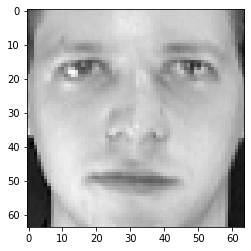

In [21]:
plt.imshow(np.reshape(x_shaped, (64, 64)), cmap="gray")
plt.show()

In [22]:
x_rot90 = np.reshape(np.rot90(x_shaped), (4096))

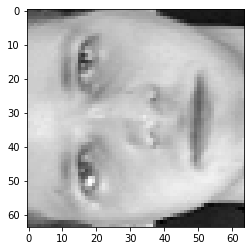

In [23]:
plt.imshow(np.reshape(x_rot90, (64, 64)), cmap="gray")
plt.show()

In [24]:
x_dim = np.clip(X[0]-0.3, 0, 1)

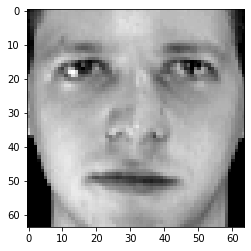

In [25]:
plt.imshow(np.reshape(x_dim, (64, 64)), cmap="gray")
plt.show()

In [26]:
x_bright = np.clip(X[0]+0.3, 0, 1)

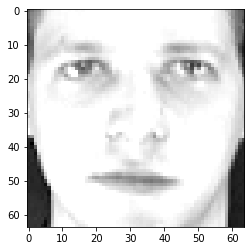

In [27]:
plt.imshow(np.reshape(x_bright, (64, 64)), cmap="gray")
plt.show()

In [28]:
x_flipped_v = np.reshape(np.flip(x_shaped), 4096)

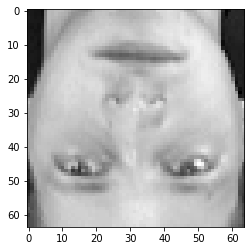

In [29]:
plt.imshow(np.flip(x_shaped), cmap="gray")
plt.show()

In [30]:
x_flipped_h = np.reshape(np.flip(x_shaped, axis=1), 4096)

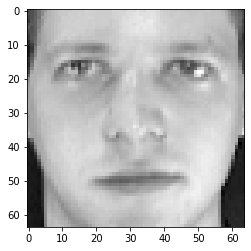

In [31]:
plt.imshow(np.flip(x_shaped, axis=1), cmap="gray")
plt.show()

In [32]:
x_noise = (X[0] + (np.random.rand(1, 4096)*0.05)).reshape(4096)

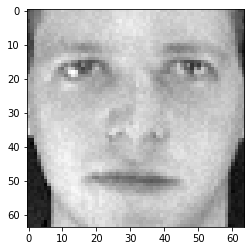

In [33]:
plt.imshow(np.reshape(x_noise, (64, 64)), cmap="gray")
plt.show()

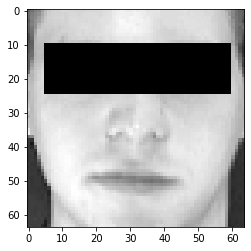

In [34]:
x_censored = x_shaped.copy()
x_censored[10:25, 5:60] = 0
plt.imshow(x_censored, cmap="gray")
plt.show()

x_censored = x_censored.reshape(4096)

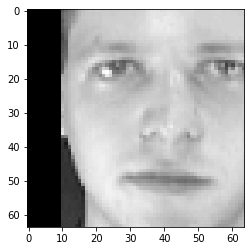

In [35]:
x_moved = x_shaped.copy()
x_moved = np.roll(x_moved, 10)
x_moved[:, 0:10] = 0
plt.imshow(x_moved, cmap="gray")
plt.show()

x_moved = x_moved.reshape(4096)

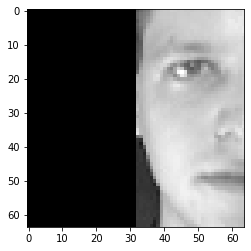

In [36]:
x_moved_2 = x_shaped.copy()
x_moved_2 = np.roll(x_moved_2, 32)
x_moved_2[:, 0:32] = 0
plt.imshow(x_moved_2, cmap="gray")
plt.show()

x_moved_2 = x_moved_2.reshape(4096)

# 4. Na zmodyfikowanych

In [37]:
def plot_reconstructed(data, name=""):
    fig, axs = plt.subplots(1, 2)
    x = compressor.inverse_transform(
        compressor.transform(data.reshape(1, -1))
    )
    axs[0].imshow(np.reshape(data, (64, 64)), cmap="gray")
    axs[0].set_title(name)
    axs[1].imshow(np.reshape(x, (64, 64)), cmap="gray")
    axs[1].set_title("recreated")
    print(
        "RMSE = {}".format(
        mean_squared_error(data, x[0], squared=False)
        )
    )

RMSE = 0.08547560125589371


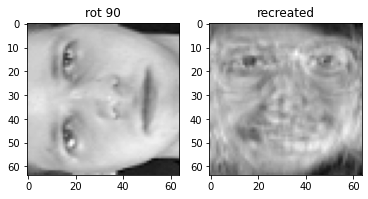

In [38]:
plot_reconstructed(x_rot90, name="rot 90")

RMSE = 0.03486734628677368


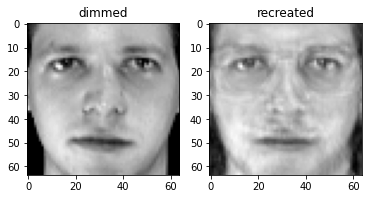

In [39]:
plot_reconstructed(x_dim, name="dimmed")

RMSE = 0.0391799621284008


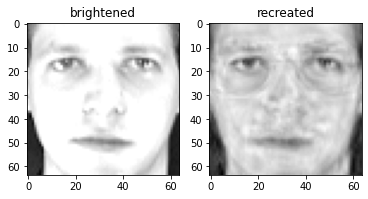

In [40]:
plot_reconstructed(x_bright, name="brightened")

RMSE = 0.07795185595750809


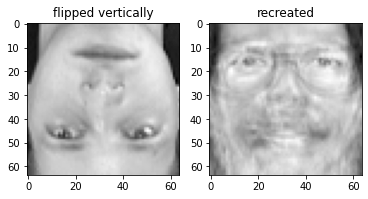

In [41]:
plot_reconstructed(x_flipped_v, name="flipped vertically")

RMSE = 0.041032761335372925


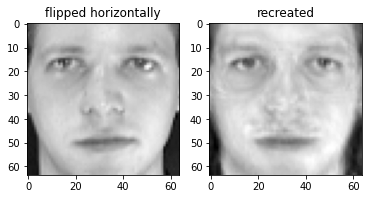

In [42]:
plot_reconstructed(x_flipped_h, name="flipped horizontally")

RMSE = 0.03353395620372287


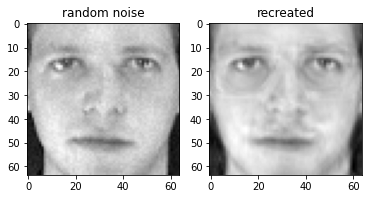

In [43]:
plot_reconstructed(x_noise, name="random noise")

RMSE = 0.12494353204965591


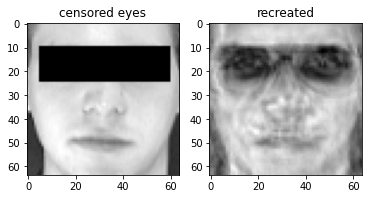

In [44]:
plot_reconstructed(x_censored, name="censored eyes")

RMSE = 0.09659858793020248


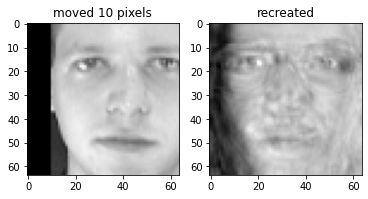

In [45]:
plot_reconstructed(x_moved, name="moved 10 pixels")

RMSE = 0.09327864646911621


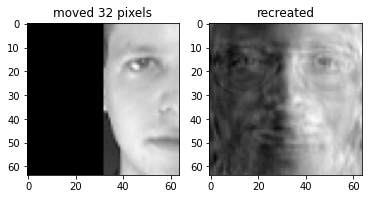

In [46]:
plot_reconstructed(x_moved_2, name="moved 32 pixels")

# 5. Detekcja anomalii
Na podstawie powyższych odtworzeń i obliczonego RMSE można stwierdzić, że PCA może być użyte w ten sposób do wykrywania pewnych anomalii związanych z pozycją i czytelnością twarzy.
Rozjaśnienie, przyciemnienie, dodanie szumu oraz odbicie lustrzane nie miało dużego wpływu na RMSE, ale przesunięcia, obroty i wycięcia już miały. Czyli ta metoda jest w stanie wykryć anomalie związane z właśnie tego typu transformacjami.